In [20]:
import pandas as pd
import os
# Read data into papers
papers = pd.read_csv('/home/purvj/Documents/Final Year Project/CSV/Fake.csv')
# Print head
papers.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [21]:
papers = papers.drop(columns=['title', 'subject', 'date'], axis=1).sample(100)
papers.head()

,text
22049,21st Century Wire says The war between the Whi...
5512,Emotions around the nation are raw due to the ...
17521,"One month ago, CNN political analyst and Ameri..."
22474,Tune in to the Alternate Current Radio Network...
20776,"Make no mistake about it, we are seeing tactic..."


In [22]:
import re
papers['text_processed'] = \
papers['text'].map(lambda x: re.sub('[,\.!?]', '', x))

In [23]:
# Convert the titles to lowercase
papers['text_processed'] = \
papers['text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['text_processed'].head()

22049    21st century wire says the war between the whi...
5512     emotions around the nation are raw due to the ...
17521    one month ago cnn political analyst and americ...
22474    tune in to the alternate current radio network...
20776    make no mistake about it we are seeing tactics...
Name: text_processed, dtype: object

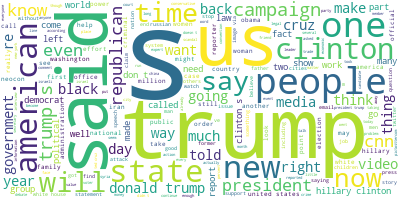

In [24]:
from wordcloud import WordCloud
long_string = ','.join(list(papers['text_processed'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [25]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = papers.text_processed.values.tolist()
data_words = list(sent_to_words(data))


data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /home/purvj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['st', 'century', 'wire', 'says', 'war', 'white', 'house', 'cnn', 'continued', 'weekduring', 'recent', 'white', 'house', 'press', 'briefing', 'trump', 'new', 'immigration', 'restriction', 'bill', 'raise', 'act', 'white', 'house', 'adviser', 'stephen', 'miller', 'suddenly', 'locked', 'horns']


In [26]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 9), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 3), (22, 3), (23, 1), (24, 3), (25, 1), (26, 1), (27, 4), (28, 1), (29, 1)]


In [27]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,id2word=id2word,num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.014*"trump" + 0.005*"people" + 0.005*"clinton" + 0.004*"one" + '
  '0.004*"hillary" + 0.004*"us" + 0.004*"president" + 0.003*"said" + '
  '0.003*"donald" + 0.003*"like"'),
 (1,
  '0.011*"clinton" + 0.006*"trump" + 0.005*"said" + 0.004*"people" + '
  '0.004*"one" + 0.004*"black" + 0.004*"would" + 0.003*"us" + 0.003*"state" + '
  '0.003*"like"'),
 (2,
  '0.007*"trump" + 0.005*"people" + 0.005*"cruz" + 0.004*"clinton" + '
  '0.004*"like" + 0.004*"us" + 0.003*"cnn" + 0.003*"campaign" + 0.003*"one" + '
  '0.003*"president"'),
 (3,
  '0.009*"trump" + 0.008*"clinton" + 0.006*"people" + 0.004*"obama" + '
  '0.004*"one" + 0.004*"us" + 0.004*"said" + 0.004*"president" + 0.003*"would" '
  '+ 0.003*"american"'),
 (4,
  '0.007*"state" + 0.004*"new" + 0.004*"people" + 0.004*"us" + 0.004*"trump" + '
  '0.004*"clinton" + 0.003*"would" + 0.003*"one" + 0.003*"said" + '
  '0.003*"obama"'),
 (5,
  '0.025*"trump" + 0.006*"clinton" + 0.005*"president" + 0.004*"said" + '
  '0.004*"donald" + 0.004*"

In [29]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('/home/purvj/Documents/Final Year Project/result/fake/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, '/home/purvj/Documents/Final Year Project/result/fake/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

/home/purvj/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.001277  0.001578       1        1  17.920231
3     -0.000174  0.021583       2        1  15.577403
5      0.035733  0.014580       3        1  14.733205
6     -0.011996 -0.030738       4        1  11.395883
4     -0.040050  0.009921       5        1   9.236932
0      0.024550 -0.021091       6        1   7.735000
7      0.005177  0.011794       7        1   7.648201
9      0.005511 -0.001540       8        1   7.235895
2     -0.005656 -0.015152       9        1   5.537974
8     -0.011817  0.009065      10        1   2.979276, topic_info=         Term        Freq       Total Category  logprob  loglift
262     trump  259.000000  259.000000  Default  30.0000  30.0000
267        us  102.000000  102.000000  Default  29.0000  29.0000
1305     cruz   45.000000   45.000000  Default  28.0000  28.0000
772     state   74.000000   74.000000  Default  27.0000  27.0000
45        cnn   41.000000   41.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
123   hillary    1.231428   56.281601  Topic10  -6.3742  -0.3087
772     state    1.286099   74.907846  Topic10  -6.3307  -0.5512
276     white    1.194861   47.999017  Topic10  -6.4043  -0.1797
1412      way    1.127762   33.328509  Topic10  -6.4621   0.1273
1522   public    1.126382   32.936028  Topic10  -6.4633   0.1379

[772 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
6637      5  0.688648  abusethey
0         1  0.124005  according
0         2  0.124005  according
0         3  0.186008  according
0         4  0.124005  according
...     ...       ...        ...
1056      3  0.137856      young
1056      4  0.137856      young
1056      5  0.068928      young
1056      6  0.068928      young
1056      7  0.068928      young

[1929 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 6, 7, 5, 1, 8, 10, 3, 9])